In [1]:
import pandas as pd

In [6]:
import seaborn as sns

In [2]:
data = pd.read_csv("compas.csv")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [20]:
df = {
    'sex':["male", "female"],
    'count':[5800, 1400]
}
data2 = pd.DataFrame(df)

<Axes: >

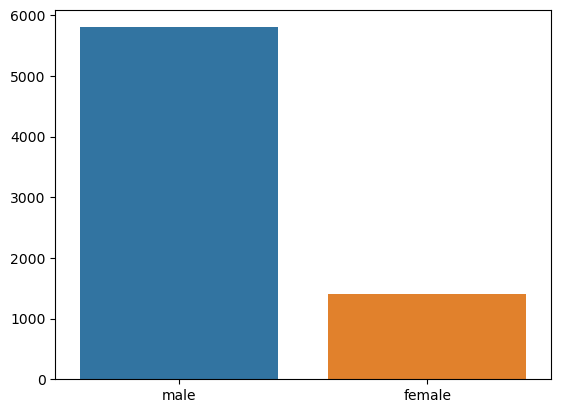

In [21]:
sns.barplot(x='sex', y='count', data=df)

In [29]:
countOlder45 = 0
countYounger25 = 0
count2545 = 0

for i in data["age"]:
    if i > 45:
        countOlder45 += 1
    if i < 25:
        countYounger25 += 1
    if i >= 25 and i<=45:
        count2545 += 1


In [30]:
print(countOlder45)

1463


In [31]:
print(countYounger25)

1529


In [32]:
print(count2545)

4222


<Axes: xlabel='categories', ylabel='ages'>

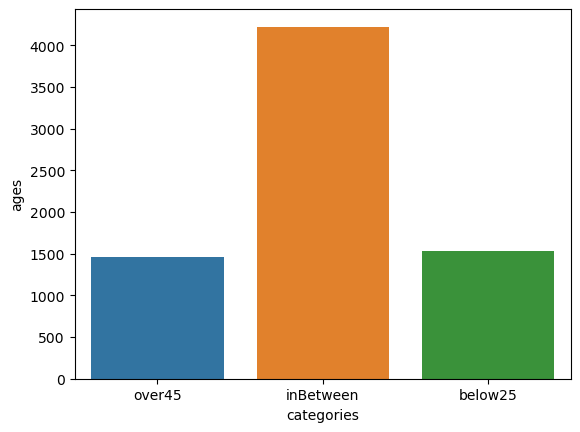

In [35]:
criminalAge = {
    'categories':["over45", "inBetween", "below25"],
    'ages':[1463, 4222, 1529]
}
criminalAgeDf = pd.DataFrame(criminalAge)
sns.barplot(x = 'categories', y = 'ages', data = criminalAgeDf)

<Axes: xlabel='categories', ylabel='ages'>

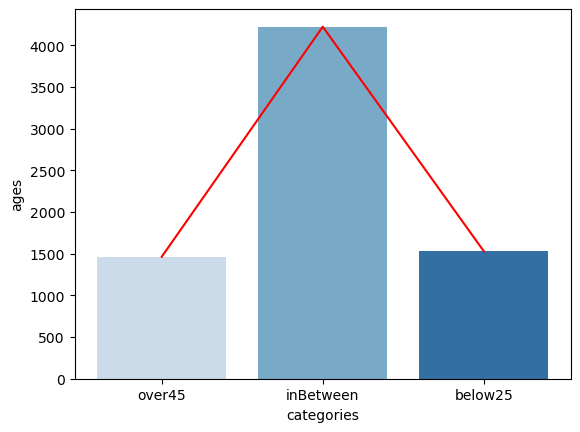

In [45]:
sns.barplot(data=criminalAgeDf, x='categories', y='ages', palette="Blues")
sns.lineplot(data=criminalAgeDf, x='categories', y='ages', color='red')